In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os

print("Libraries loaded.")


Libraries loaded.


In [29]:

df = pd.read_csv('raw_data.csv')

df.head()



,Name,Age,Gender,Income,Education
0,Alice,25.0,Female,50000.0,Bachelor
1,Bob,NaN,Male,48000.0,Master
2,Charlie,35.0,NaN,62000.0,Bachelor
3,David,40.0,Male,300000.0,PhD
4,Eve,22.0,Female,28000.0,High School


In [7]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       7 non-null      object 
 1   Age        6 non-null      float64
 2   Gender     6 non-null      object 
 3   Income     6 non-null      float64
 4   Education  7 non-null      object 
dtypes: float64(2), object(3)
memory usage: 412.0+ bytes


,Age,Income
count,6.000000,6.000000
mean,34.833333,98000.000000
std,14.020223,101791.944671
min,22.000000,28000.000000
25%,25.500000,48500.000000
50%,31.000000,56000.000000
75%,38.750000,90500.000000
max,60.000000,300000.000000


In [9]:
df.isnull().sum()


Name         0
Age          1
Gender       1
Income       1
Education    0
dtype: int64

In [31]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

df['Income'] = df['Income'].fillna(df['Income'].median())
df.columns = df.columns.str.strip()

KeyError: 'Gender'

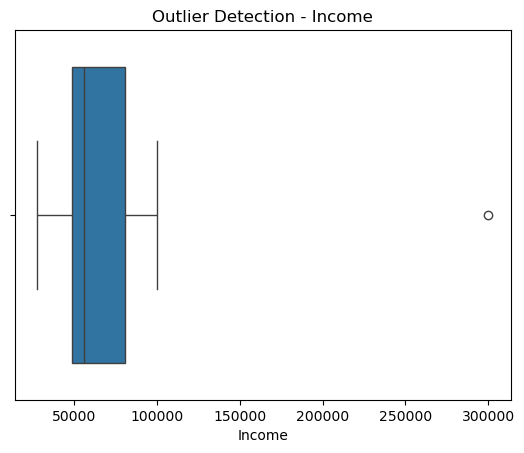

In [27]:
sns.boxplot(x=df['Income'])
plt.title("Outlier Detection - Income")
plt.show()


In [15]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


df = df[(df['Income'] >= lower) & (df['Income'] <= upper)]


df.shape


(5, 5)

In [33]:
print("Actual column names in the DataFrame:")
print(df.columns.tolist())



Actual column names in the DataFrame:
['Name ', 'Age', 'Gender ', 'Income', 'Education']


In [35]:
df.columns = df.columns.str.strip()
print("Cleaned column names:")
print(df.columns.tolist())


Cleaned column names:
['Name', 'Age', 'Gender', 'Income', 'Education']


In [37]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Income'] = df['Income'].fillna(df['Income'].median())


In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [41]:
os.makedirs("cleaned_data", exist_ok=True)


df.to_csv("cleaned_data/cleaned_data.csv", index=False)

print("Cleaned data saved to 'cleaned_data/cleaned_data.csv'")


Cleaned data saved to 'cleaned_data/cleaned_data.csv'


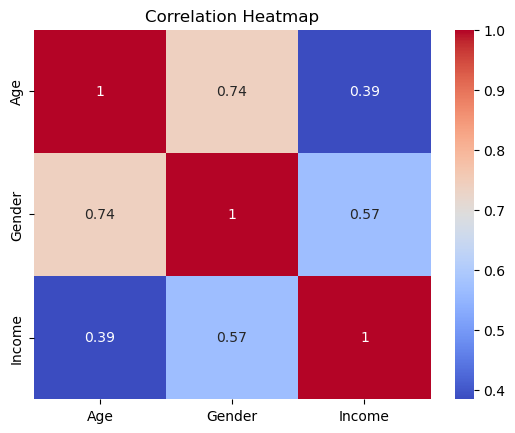

In [45]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [47]:
print(df.dtypes)


Name          object
Age          float64
Gender         int32
Income       float64
Education     object
dtype: object


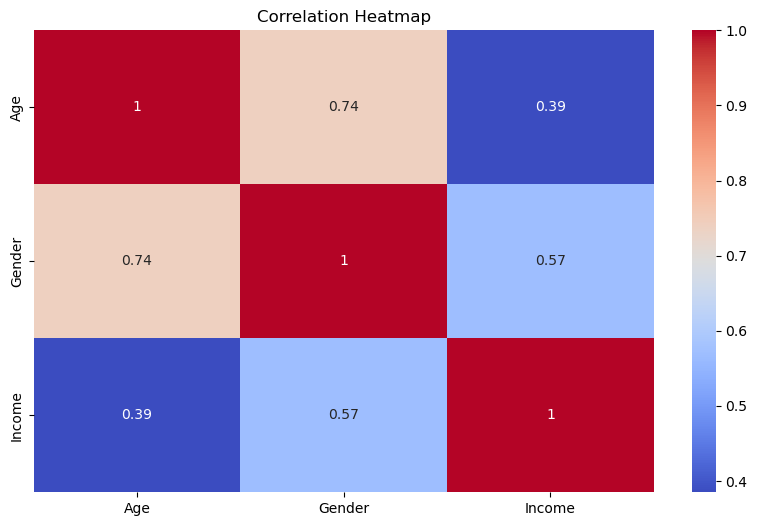

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
